In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint

# DataSciencester

### Encontrando conectores-chave

In [5]:
# users
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
]

# friends based on ids
friendships = [
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4),
    (4,5),
    (5, 6),
    (5, 6),
    (5, 7),
    (6, 8),
    (7, 8),
    (8, 9),
]

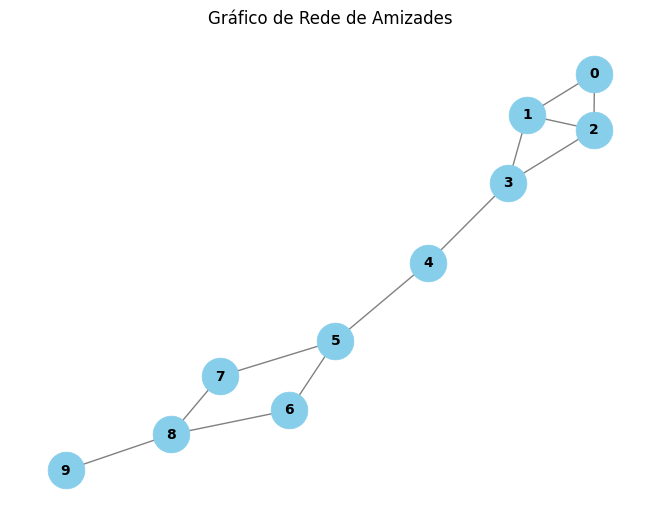

In [6]:
# Criar um grafo não direcionado
G = nx.Graph()

# Adicionar arestas ao grafo
G.add_edges_from(friendships)

# Desenhar o grafo
pos = nx.spring_layout(G)  # Layout para visualização
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5, arrowsize=10)

# Exibir o gráfico
plt.title("Gráfico de Rede de Amizades")
plt.show()

In [7]:
# Adiciona na variavel users amigos desse id
for user in users:
    user["friends"] = []

for i, j in friendships:
    users[i]["friends"].append(users[j]) #adds i como amigo de j
    users[j]["friends"].append(users[i]) #adds j como amigo de i

In [8]:
# Qual é o numero médio de conexões?

def number_of_friends(user):
    """quantos amigos o usuário tem?"""
    return len(user["friends"])

total_connections = sum(number_of_friends(user) for user in users) # 26
num_users = len(users)
total_connections / num_users #2.6

2.6

In [9]:
# Encontrar pessoas com maiores numeros de amigos
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
sorted(num_friends_by_id, key=lambda x: x[1], reverse=True)
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 4),
 (6, 3),
 (7, 2),
 (8, 3),
 (9, 1)]

### Cientistas de dados que voce talvez conheça

In [10]:
# amigos de amigos
def friends_of_friend_ids_bad(user):
    """foaf é abreviacao de friends of a friend"""
    return [foaf["id"] for friend in user["friends"] for foaf in friend["friends"]]

friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [11]:
pprint([friend["id"] for friend in users[0]["friends"]])
pprint([friend["id"] for friend in users[1]["friends"]])
pprint([friend["id"] for friend in users[2]["friends"]])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [12]:
from collections import Counter

In [13]:
def not_the_same(user, other_user):
    """
        dois usuarios nao sao os mesmos se possuem ids diferentes
    """
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    """
        other_user não é um amigo se não está em user["fiends"];
        isso é, se é not_te_same com todas as pessoas em user["friends"]
    """
    return all(not_the_same(friend, other_user) for friend in user ["friends"])

def friends_of_friends_ids(user):
    return Counter(
        foaf["id"] 
        for friend in user["friends"]   # para cada um dos amigos
        for foaf in friend["friends"]   # que contam *their* amigos
        if not_the_same(user, foaf)     # que não sejam eu
        and not_friends(user,foaf)      # e que não são meus amigos
        )

pprint(friends_of_friends_ids(users[3]))

Counter({0: 2, 5: 1})


In [1]:

interests = [
    (0, 'hadoop'), (0, 'bigdata'), (0, 'hbase'), (0, 'java'), (0, 'spark'), (0, 'cassandra'),
    (1, 'nosql'), (1, 'mongodb'), (1, 'cassandra'), (1, 'hbase'), (1, 'postgres'),
    (2, 'python'), (2, 'scikit learn'), (2, 'scipy'), (2, 'numpy'), (2, 'statsmodels'), (2, 'pandas'),
    (3, 'r'), (3, 'python'), (3, 'statistics'), (3, 'regression'), (3, 'probability'),
    (4, 'machine learning'), (4, 'regression'), (4, 'decision trees'), (4, 'libsvm'),
    (5, 'python'), (5, 'r'), (5, 'java'), (5, 'c++'), (5, 'haskell'), (5, 'programming languages'),
    (6, 'statistics'), (6, 'probability'), (6, 'mathematics'), (6, 'theory'),
    (7, 'machine learning'), (7, 'scikit learn'), (7, 'mahout'), (7, 'neural networks'),
    (8, 'neural networks'), (8, 'deep learning'), (8, 'bigdata'), (8, 'artificial intelligence'),
    (9, 'hadoop'), (9, 'java'), (9, 'mapreduce'), (9, 'bigdata'),
]